# 1) Count number of lines (sample)

In [2]:
! bzcat ~/Data/challenge/bookings.csv.bz2 | head -10000 > ~/Data/challenge/bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.csv.bz2, output file = (stdout)


In [4]:
! bzip2 -f ~/Data/challenge/bookings.sample.csv

In [5]:
! bzcat ~/Data/challenge/bookings.sample.csv.bz2 | wc -l

10000


In [8]:
# Otra forma, importando libreria bz2

In [6]:
import bz2

In [12]:
fileBz2 = bz2.BZ2File('/home/dsc/Data/challenge/bookings.sample.csv.bz2')
k = 0
for line in fileBz2:
    k += 1
print(k)

10000


In [13]:
fileBz2.closed

False

In [14]:
fileBz2.close()

In [15]:
fileBz2.closed

True

In [14]:
# Otra forma, para que el fichero se cierre automaticamente

In [16]:
with bz2.BZ2File('/home/dsc/Data/challenge/bookings.sample.csv.bz2') as fileBz2:
    k = 0
    for line in fileBz2:
        k += 1
    print(k)

10000


In [17]:
fileBz2.closed

True

In [17]:
# Otra forma, para lanzar errores y que no se pare ejecucion

In [16]:
import bz2
try:
    with bz2.BZ2File('/home/dsc/Data/challenge/bookings.sample.csv.bz2') as fileBz2:
        k = 0
        for line in fileBz2:
            k += 1
        print(k)
except:
    print('unexpected error')

10000


In [17]:
import bz2
try:
    with bz2.BZ2File('/home/dsc/Data/challenge/bookings.sample.csv.bz2') as fileBz2:
        k = 0
        for line in fileBz2:
            k += 1
        print(k)
except FileNotFoundError:
    print('File not found')
except:
    print('unexpected error')

10000


In [20]:
import bz2
try:
    with bz2.BZ2File('data/bookinfffgs.sample.csv.bz2') as fileBz2:
        k = 0
        for line in fileBz2:
            k += 1
        print(k)
except FileNotFoundError as message:
    print(message)
except ValueError:
    print('value error')
except:
    print('unexpected error')

[Errno 2] No such file or directory: 'data/bookinfffgs.sample.csv.bz2'


In [21]:
# Con enumerate

In [18]:
import bz2
try:
    with bz2.BZ2File('/home/dsc/Data/challenge/bookings.sample.csv.bz2') as fileBz2:
        for k, line in enumerate(fileBz2):
            pass
        print(k+1)
except FileNotFoundError as message:
    print(message)
except ValueError:
    print('value error')
except:
    print('unexpected error')

10000


In [ ]:
# Con pandas

In [19]:
import pandas as pd

In [20]:
! bzcat /home/dsc/Data/challenge/bookings.sample.csv.bz2 | head -1 | tr ^ '\n'


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/bookings.sample.csv.bz2, output file = (stdout)
act_date           
source
pos_ctry
pos_iata
pos_oid  
rloc          
cre_date           
duration
distance
dep_port
dep_city
dep_ctry
arr_port
arr_city
arr_ctry
lst_port
lst_city
lst_ctry
brd_port
brd_city
brd_ctry
off_port
off_city
off_ctry
mkt_port
mkt_city
mkt_ctry
intl
route          
carrier
bkg_class
cab_class
brd_time           
off_time           
pax
year
month
oid      


In [21]:
df = pd.read_csv('/home/dsc/Data/challenge/bookings.sample.csv.bz2', sep='^', usecols=['pax'])

In [22]:
df.shape, len(df)

((9999, 1), 9999)

# 2) Top 10 arrival airports from bookings

In [11]:
# Get familiar with data

In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [24]:
b = pd.read_csv('/home/dsc/Data/challenge/bookings.sample.csv.bz2', sep='^')

In [25]:
b.shape

(9999, 38)

In [26]:
b.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [27]:
b.sample(5)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
3083,2013-03-15 00:00:00,1V,US,924e5d2de04dee72d3a81d5002ab6d80,c4cbca76d7f9959e1b87667830cde0ab,8dfb3f0dfbe2c1dd9da4d6828f3c6d2e,2013-03-14 00:00:00,3489,0,CLT,CLT,US,SLC,SLC,US,CLT,CLT,US,CLT,CLT,US,SLC,SLC,US,CLTSLC,CLTSLC,USUS,0,CLTSLC,NV,Q,Y,2013-04-08 07:30:00,2013-04-08 09:33:39,-1,2013,3,NULL
2678,2013-03-04 00:00:00,1P,US,6227ba64c843c7a2c4eebf288b066658,f9905f22af1faf2af9bcb834d1d1f8b0,68aee71ee0f40aff44ed341f2c5f8627,2013-03-04 00:00:00,26237,0,LAX,LAX,US,JNB,JNB,ZA,LAX,LAX,US,JNB,JNB,ZA,VFA,VFA,ZW,JNBVFA,JNBVFA,ZAZW,1,JNBVFA,DK,S,Y,2013-06-01 10:50:00,2013-06-01 12:43:27,1,2013,3,NULL
4268,2013-03-11 00:00:00,1A,FR,0749c2b735ca4fbc48989dfef768c461,6bdae4a72f15b9c80ca045ae693886c9,f82aab01c8cd2f669fcf019b653ea215,2013-03-11 00:00:00,19060,0,BOD,BOD,FR,MCO,ORL,US,BOD,BOD,FR,LGA,NYC,US,MCO,ORL,US,LGAMCO,NYCORL,USUS,0,LGAMCO,NV,U,Y,2013-04-06 07:00:00,2013-04-06 09:35:59,1,2013,3,NULL
2966,2013-03-08 00:00:00,1P,US,0bde7b929573cf16e0d52637cf0735d2,f187f1dfcac9833a7d7f90de67b24181,d4e5213ecc80b2ae0f87f90b0132dce9,2012-12-24 00:00:00,13789,0,SEA,SEA,US,MLI,MLI,US,SEA,SEA,US,SEA,SEA,US,MLI,MLI,US,MLISEA,MLISEA,USUS,0,SEADENMLI,FK,L,Y,2013-07-01 05:45:00,2013-07-01 13:08:06,-5,2013,3,NULL
6052,2013-03-01 00:00:00,1P,PK,86f58a53855f9ea3ac38a67ee256fd17,7c2024cff34776e44f1f0ff45f93b30b,91415f96267e1e7bb0623d65f1598e1f,2012-10-14 00:00:00,250,2876,JED,JED,SA,KHI,KHI,PK,KHI,KHI,PK,JED,JED,SA,KHI,KHI,PK,JEDKHI,JEDKHI,PKSA,1,JEDKHI,DG,B,Y,2013-03-05 04:00:00,2013-03-05 10:10:59,1,2013,3,NULL


In [35]:
# Pero con esto no vemos todas las columnas. Hay que usar otra opcion de pandas.
# Asi que anadimos una opcion al principio, para que el default de col max sea None

In [28]:
b.groupby('rloc')['act_date'].count().sort_values(ascending=False)

KeyError: 'rloc'

In [29]:
list(b.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [30]:
b.groupby('rloc          ')['act_date           '].count().sort_values(ascending=False)

rloc          
ae15bcfc5aec0eb64b2c5204d08201d5    42
fb72a3899ed1cd353c5830388935e7f5    23
cd96f7b7fdb5743769053ba273c7eb5f    20
6b7878dd4ac59772e14ab4760ab45ad0    20
68aee71ee0f40aff44ed341f2c5f8627    16
2a86eac3e29c922f4a439fbc0480985b    15
58ee9c6852513816a39363a1621a0615    14
503d8dde8034a48c262b3f5764fc60ca    14
c9f19404e4f0755c40deaebd6e90ea84    13
182485c12b7e38aa6e2d24f7484c019b    12
cdf795b1e5710dc813c8b1147b427827    12
f3a5185d14eaa5258320bac03c5d9fc0    12
02ab3e3ded19a8cc6eb67c4413debb86    12
b8410227afd9eff71f9ed9c0e7013ddf    12
045e1c73107a2e4a39013d60e9b45aa3    12
a37584d1485cb35991e4ff1a2ba92262    12
f25cef4ed37d1483d0c4c7cfba9758ef    12
b0cd490450b69694ccafe0e08dfd821f    11
bab3d4e3fb3bee5e88340e7c359c6f13    11
2da897a9523b22f3e2cb9cd7099e0639    11
399664d8282d0587ce97c540d17eb06c    11
b0f878b0bbe51626016694032523295b    10
1e891061725828651e3e2943b79c6585    10
49edae7a10b0a8e2b2529ecc45e5dc74    10
45b87519d2fe4e85fd90512876fe9160    10
a27c351c88

In [31]:
b[b['rloc          ']=='fb72a3899ed1cd353c5830388935e7f5'].sort_values('act_date           ', ascending=True)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
5067,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,14364,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,PHX,PHX,US,HKT,HKT,TH,HKTPHX,HKTPHX,THUS,1,PHXLAXICNHKT,YK,K,Y,2013-08-30 20:00:00,2013-09-01 12:07:46,-2,2013,3,NULL
5068,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,14364,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,HKT,HKT,TH,CNX,CNX,TH,CNXHKT,CNXHKT,THTH,0,HKTCNX,EQ,Y,Y,2013-09-03 13:35:00,2013-09-03 15:46:42,-2,2013,3,NULL
5069,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,14364,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,CNX,CNX,TH,BKK,BKK,TH,BKKCNX,BKKCNX,THTH,0,CNXBKK,EQ,Y,Y,2013-09-05 15:05:00,2013-09-05 16:35:01,-2,2013,3,NULL
5070,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,14364,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,BKK,BKK,TH,ICN,SEL,KR,BKKICN,BKKSEL,KRTH,1,BKKICN,YK,E,Y,2013-09-08 23:40:00,2013-09-09 06:46:43,-2,2013,3,NULL
5071,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,14364,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,ICN,SEL,KR,PHX,PHX,US,ICNPHX,PHXSEL,KRUS,1,ICNLAXPHX,YK,E,Y,2013-09-09 20:20:00,2013-09-09 19:24:55,-2,2013,3,NULL
5072,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,13256,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,PHX,PHX,US,BKK,BKK,TH,BKKPHX,BKKPHX,THUS,1,PHXSFOBKK,FK,K,Y,2013-08-30 07:45:00,2013-08-31 16:57:23,2,2013,3,NULL
5073,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,13256,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,BKK,BKK,TH,HKT,HKT,TH,BKKHKT,BKKHKT,THTH,0,BKKHKT,AQ,L,Y,2013-09-01 08:05:00,2013-09-01 09:40:36,2,2013,3,NULL
5074,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,13256,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,HKT,HKT,TH,BKK,BKK,TH,BKKHKT,BKKHKT,THTH,0,HKTBKK,EQ,Y,Y,2013-09-02 16:25:00,2013-09-02 18:00:36,2,2013,3,NULL
5075,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,13256,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,BKK,BKK,TH,CNX,CNX,TH,BKKCNX,BKKCNX,THTH,0,BKKCNX,EQ,Y,Y,2013-09-05 10:40:00,2013-09-05 12:10:01,2,2013,3,NULL
5236,2013-03-01 00:00:00,1V,US,de1198ffef9fa56ba9fe841bac32bce8,60a531d07998240e3a5cbc207c5825e6,fb72a3899ed1cd353c5830388935e7f5,2013-02-25 00:00:00,13256,0,PHX,PHX,US,HKT,HKT,TH,PHX,PHX,US,CNX,CNX,TH,PHX,PHX,US,CNXPHX,CNXPHX,THUS,1,CNXBKKSFOPHX,FK,L,Y,2013-09-07 19:00:00,2013-09-08 12:41:47,2,2013,3,NULL


In [32]:
b.describe(include='all')

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
count,9999,9999,9999,9999,9999,9999,9999,9999.000000,9999.000000,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999,9999.000000,9999,9999,9999,9999,9999,9999,9999.000000,9999.0,9999.0,9999
unique,31,5,112,2089,2271,3638,140,NaN,NaN,581,554,127,663,634,152,581,550,126,770,732,162,781,744,162,3395,3223,926,NaN,6079,179,27,4,6416,7218,NaN,NaN,NaN,389
top,2013-03-12 00:00:00,1A,US,83ccf07a55606976f78e63fcc805f58c,1490c3c5f95f04fa076fe15c775a80a9,ae15bcfc5aec0eb64b2c5204d08201d5,2013-03-12 00:00:00,NaN,NaN,LAX,NYC,US,LHR,NYC,US,LAX,NYC,US,LAX,NYC,US,LAX,NYC,US,JEDKHI,JEDKHI,USUS,NaN,KHIJED,NV,Q,Y,2013-06-09 15:10:00,2013-06-10 12:55:31,NaN,NaN,NaN,NULL
freq,768,3200,4839,435,435,42,1018,NaN,NaN,273,507,4600,212,391,3738,281,502,4559,228,435,4118,247,460,4170,52,52,3074,NaN,26,1354,851,8979,21,21,NaN,NaN,NaN,8427
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20209.746075,455.608861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596260,NaN,NaN,NaN,NaN,NaN,NaN,0.516152,2013.0,3.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42243.233482,1738.891068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.490671,NaN,NaN,NaN,NaN,NaN,NaN,1.783970,0.0,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-25.000000,2013.0,3.0,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3339.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,2013.0,3.0,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7721.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2013.0,3.0,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19077.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2013.0,3.0,NaN


In [33]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 38 columns):
act_date               9999 non-null object
source                 9999 non-null object
pos_ctry               9999 non-null object
pos_iata               9999 non-null object
pos_oid                9999 non-null object
rloc                   9999 non-null object
cre_date               9999 non-null object
duration               9999 non-null int64
distance               9999 non-null int64
dep_port               9999 non-null object
dep_city               9999 non-null object
dep_ctry               9999 non-null object
arr_port               9999 non-null object
arr_city               9999 non-null object
arr_ctry               9999 non-null object
lst_port               9999 non-null object
lst_city               9999 non-null object
lst_ctry               9999 non-null object
brd_port               9999 non-null object
brd_city               9999 non-null object
brd_ctry       

In [34]:
b.isnull().sum()

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [39]:
# Select columns of interest

In [43]:
import pandas as pd
pd.set_option('display.max_columns', None)

b = pd.read_csv('/home/dsc/Data/challenge/bookings.sample.csv.bz2', 
                sep='^', usecols=['arr_port', 'year', 'pax'])
b = b.dropna()

In [44]:
b.shape

(9999, 3)

In [38]:
b.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [39]:
b_gr = b[ b['year']==2013 ].groupby('arr_port').sum().sort_values('pax', ascending=False)

In [40]:
b_gr.head()

,pax,year
arr_port,,
HKG,112,245586
LGA,95,301950
ORD,94,352275
JFK,92,352275
LAX,91,406626


In [41]:
b_gr.reset_index().head(10)

,arr_port,pax,year
0,HKG,112,245586
1,LGA,95,301950
2,ORD,94,352275
3,JFK,92,352275
4,LAX,91,406626
5,SFO,91,314028
6,MCO,90,243573
7,DCA,82,177144
8,DEN,79,179157
9,LHR,76,426756


In [63]:
# Trabajar por chunks

In [45]:
import pandas as pd
pd.set_option('display.max_columns', None)

b = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                usecols=['arr_port', 'year', 'pax'], nrows=9999)
b = b.dropna()
b = b[ b['year']==2013]    #vemos que todas las filas son del year 2013
del b['year']
b_gr = b.groupby('arr_port').sum().sort_values('pax', ascending=False)
b_gr.reset_index(inplace=True)
b_gr.head(10)

,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,LAX,91
5,SFO,91
6,MCO,90
7,DCA,82
8,DEN,79
9,LHR,76


In [46]:
bi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                 usecols=['arr_port', 'year', 'pax'], nrows=9999, iterator=True)

In [47]:
type(bi)

pandas.io.parsers.TextFileReader

In [48]:
b1 = bi.get_chunk(6000)

In [49]:
type(b1)

pandas.core.frame.DataFrame

In [50]:
b1.head()

,arr_port,pax,year
0,LHR,-1,2013
1,CLT,1,2013
2,CLT,1,2013
3,SVO,1,2013
4,SVO,1,2013


In [51]:
b2 = bi.get_chunk(3000)

In [52]:
b2.head()

,arr_port,pax,year
6000,BOS,1,2013
6001,BOS,-1,2013
6002,BOS,-1,2013
6003,BOS,1,2013
6004,PHX,1,2013


In [53]:
bi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                 usecols=['arr_port', 'year', 'pax'], nrows=9999, chunksize=3000)

In [54]:
for i, b in enumerate(bi):
    print(i)
    print(len(b))

0
3000
1
3000
2
3000
3
999


In [56]:
bi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                 usecols=['arr_port', 'year', 'pax'], nrows=9999, chunksize=3000)
for i, b in enumerate(bi):
    print(i)
    print(len(b))

0
3000
1
3000
2
3000
3
999


In [57]:
bi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                 usecols=['arr_port', 'year', 'pax'], nrows=9999, chunksize=3000)
all_chunks = pd.DataFrame()
for i, b in enumerate(bi):
    print(i)
    b = b.dropna()
    b = b[ b['year']==2013]    #vemos que todas las filas son del year 2013
    del b['year']
    b_gr = b.groupby('arr_port').sum().sort_values('pax', ascending=False)
    b_gr.reset_index(inplace=True)
    
    all_chunks = all_chunks.append(b_gr)

all_result = all_chunks.groupby('arr_port').sum().sort_values('pax', ascending=False).reset_index()

0
1
2
3


In [58]:
all_chunks.shape

(1344, 2)

In [59]:
all_result.shape

(663, 2)

In [60]:
all_result.head(10)

,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,LAX,91
5,SFO,91
6,MCO,90
7,DCA,82
8,DEN,79
9,LHR,76


In [71]:
#Una vez que funciona, lo lanzamos sobre el fichero total

In [61]:
%%time
bi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', 
                 usecols=['arr_port', 'year', 'pax'], chunksize=1000000)
all_chunks = pd.DataFrame()
for i, b in enumerate(bi):
    print(i)
    b = b.dropna()
    b = b[ b['year']==2013]    #vemos que todas las filas son del year 2013
    del b['year']
    b_gr = b.groupby('arr_port').sum().sort_values('pax', ascending=False)
    b_gr.reset_index(inplace=True)
    
    all_chunks = all_chunks.append(b_gr)

all_result = all_chunks.groupby('arr_port').sum().sort_values('pax', ascending=False).reset_index()

0
1
2
3
4
5
6
7
8
9
10
CPU times: user 4min 26s, sys: 3.34 s, total: 4min 30s
Wall time: 4min 27s


In [62]:
! pip install Neobase

In [63]:
import neobase as nb

In [64]:
from neobase import NeoBase

In [65]:
geoDict = NeoBase()

In [66]:
type(geoDict)

neobase.neobase.NeoBase

In [67]:
geoDict.get('LHR')

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.44517643489228376,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [68]:
type(geoDict.get('LHR'))

dict

In [69]:
geoDict.get('LHR')['name']

'London Heathrow Airport'

In [70]:
all_result.head()

,arr_port,pax
0,LHR,88809.0
1,MCO,70930.0
2,LAX,70530.0
3,LAS,69630.0
4,JFK,66270.0


In [71]:
all_result['arr_port'][0]   #vemos que hay espacios!!

'LHR     '

In [72]:
all_result['arr_port'][0].strip()

'LHR'

In [73]:
all_result['arr_port'] = all_result['arr_port'].str.strip()

In [74]:
all_result['AirportName'] = all_result['arr_port'].map(lambda x: geoDict.get(x)['name'])

KeyError: 'Key not found: CPQ'

In [75]:
all_result[ all_result['arr_port']=='CPQ' ]

,arr_port,pax
2257,CPQ,-20.0


In [76]:
all_result = all_result[ all_result['arr_port']!='CPQ' ]

In [77]:
all_result[ all_result['arr_port']=='CPQ' ]

,arr_port,pax


In [78]:
all_result['AirportName'] = all_result['arr_port'].map(lambda x: geoDict.get(x)['name'])

In [79]:
all_result.head(10)

,arr_port,pax,AirportName
0,LHR,88809.0,London Heathrow Airport
1,MCO,70930.0,Orlando International Airport
2,LAX,70530.0,Los Angeles International Airport
3,LAS,69630.0,McCarran International Airport
4,JFK,66270.0,John F. Kennedy International Airport
5,CDG,64490.0,Paris Charles de Gaulle Airport
6,BKK,59460.0,Suvarnabhumi Airport
7,MIA,58150.0,Miami International Airport
8,SFO,58000.0,San Francisco International Airport
9,DXB,55590.0,Dubai International Airport


In [80]:
all_result = all_result.astype({'pax':int})

In [81]:
all_result.head(10)

,arr_port,pax,AirportName
0,LHR,88809,London Heathrow Airport
1,MCO,70930,Orlando International Airport
2,LAX,70530,Los Angeles International Airport
3,LAS,69630,McCarran International Airport
4,JFK,66270,John F. Kennedy International Airport
5,CDG,64490,Paris Charles de Gaulle Airport
6,BKK,59460,Suvarnabhumi Airport
7,MIA,58150,Miami International Airport
8,SFO,58000,San Francisco International Airport
9,DXB,55590,Dubai International Airport


In [82]:
all_result.shape

(2273, 3)

In [83]:
all_result.to_csv('/home/dsc/Data/challenge/top_airports.csv', sep='^', index=False)

In [84]:
! head -3 top_airports.csv

head: cannot open 'top_airports.csv' for reading: No such file or directory


# 5) Write a web service

In [1]:
from flask import Flask

In [2]:
app = Flask('My first web service')
@app.route('/hello', methods=['GET'])
def get_hello():
    return 'Hello DS from thr service!'

In [3]:
app.run()

 * Serving Flask app "My first web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2020 17:09:59] "GET /hello HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:09:59] "GET /favicon.ico HTTP/1.1" 404 -


In [166]:
app = Flask('My first web service')
@app.route('/hello', methods=['GET'])
def get_hello():
    return 'Hello DS from thr service!'

@app.route('/ret_number', methods=['GET'])
def get_number():
    return 'expecting a number'

In [167]:
app.run()

 * Serving Flask app "My first web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Jan/2020 13:58:11] "GET /ret_number HTTP/1.1" 200 -


In [6]:
app = Flask('My first web service')
@app.route('/hello', methods=['GET'])
def get_hello():
    return 'Hello DS from thr service!'

@app.route('/ret_number/<int:n>', methods=['GET'])
def get_number(n):
    return 'I got %d'%n

In [7]:
app.run()

 * Serving Flask app "My first web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2020 17:13:51] "GET /ret_number/5 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:13:55] "GET /ret_number/-5 HTTP/1.1" 404 -


In [16]:
app = Flask('My first web service')
@app.route('/hello', methods=['GET'])
def get_hello():
    return 'Hello DS from thr service!'

@app.route('/ret_number/<n>', methods=['GET'])
def get_number(n):
    try:
        numb = int(n)
        if numb > 0:
            return 'I got %i'%numb
        else:
            return 'Need a number > 0'
    except:
        return 'Not a number'

In [17]:
app.run()

 * Serving Flask app "My first web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2020 17:21:15] "GET /ret_number/-8 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:21:18] "GET /ret_number/8 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:21:25] "GET /ret_number/hioo HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:22:17] "GET /ret_number/-87 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:22:24] "GET /ret_number/15 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:25:56] "GET /ret_number/8 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:25:56] "GET /favicon.ico HTTP/1.1" 404 -


In [18]:
import json

In [19]:
lista = list('abcd')

In [20]:
lista

['a', 'b', 'c', 'd']

In [21]:
json.dumps(lista)

'["a", "b", "c", "d"]'

In [27]:
myDict = {'name':'John', 'age':32, 'city':'New York'}

In [23]:
myDict

{'name': 'John', 'age': 32, 'city': 'New York'}

In [24]:
json.dumps(myDict)

'{"name": "John", "age": 32, "city": "New York"}'

In [29]:
myDict2 = {'name':['John', 'Joana'], 'age':[32, 34], 'city':['New York', 'Dallas']}

In [31]:
json.dumps(myDict2)

'{"name": ["John", "Joana"], "age": [32, 34], "city": ["New York", "Dallas"]}'

In [32]:
import pandas as pd

In [35]:
df = pd.DataFrame.from_dict(myDict2, orient='index')

In [36]:
df

,0,1
name,John,Joana
age,32,34
city,New York,Dallas


In [37]:
df = pd.DataFrame.from_dict(myDict2)

In [38]:
df.to_json()

'{"name":{"0":"John","1":"Joana"},"age":{"0":32,"1":34},"city":{"0":"New York","1":"Dallas"}}'

In [39]:
top_airport = pd.read_csv('/home/dsc/Data/challenge/top_airports.csv', sep='^')

In [40]:
top_airport.head()

,arr_port,pax,AirportName
0,LHR,88809,London Heathrow Airport
1,MCO,70930,Orlando International Airport
2,LAX,70530,Los Angeles International Airport
3,LAS,69630,McCarran International Airport
4,JFK,66270,John F. Kennedy International Airport


In [41]:
top_airport.head(50).to_json()

'{"arr_port":{"0":"LHR","1":"MCO","2":"LAX","3":"LAS","4":"JFK","5":"CDG","6":"BKK","7":"MIA","8":"SFO","9":"DXB","10":"ORD","11":"FCO","12":"IST","13":"DFW","14":"CUN","15":"MAD","16":"BCN","17":"LGA","18":"ATL","19":"EWR","20":"BOS","21":"DEL","22":"SYD","23":"BOM","24":"MUC","25":"DEN","26":"MNL","27":"HKG","28":"FRA","29":"ORY","30":"SEA","31":"FLL","32":"TXL","33":"AMS","34":"PHX","35":"DCA","36":"MEX","37":"IAH","38":"JED","39":"PVG","40":"YYZ","41":"VIE","42":"LIS","43":"SIN","44":"CAI","45":"HNL","46":"ATH","47":"MEL","48":"SAN","49":"JNB"},"pax":{"0":88809,"1":70930,"2":70530,"3":69630,"4":66270,"5":64490,"6":59460,"7":58150,"8":58000,"9":55590,"10":53200,"11":45120,"12":43850,"13":42420,"14":42000,"15":41410,"16":41200,"17":40712,"18":39780,"19":36890,"20":35840,"21":35680,"22":33690,"23":33440,"24":33180,"25":32630,"26":32400,"27":32020,"28":31970,"29":31800,"30":31530,"31":31170,"32":30590,"33":30580,"34":29730,"35":29000,"36":28120,"37":28090,"38":27090,"39":26630,"40":260

In [42]:
# Version final

In [43]:
import pandas as pd
from flask import Flask
top_airport = pd.read_csv('/home/dsc/Data/challenge/top_airports.csv', sep='^')

In [44]:
app = Flask('My first web service')
@app.route('/hello', methods=['GET'])
def get_hello():
    return 'Hello DS from thr service!'

@app.route('/ret_number/<n>', methods=['GET'])
def get_number(n):
    try:
        numb = int(n)
        if numb > 0:
            return top_airport.head(numb).to_json()
        else:
            return 'Need a number > 0'
    except:
        return 'Not a number'

In [45]:
app.run()

 * Serving Flask app "My first web service" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Jan/2020 17:46:33] "GET /ret_number/15 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:46:42] "GET /ret_number/20 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:47:26] "GET /ret_number/15 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:47:52] "GET /ret_number/70 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:48:37] "GET /ret_number/-10 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:48:40] "GET /ret_number/rvrvr HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:48:45] "GET /ret_number/55 HTTP/1.1" 200 -
127.0.0.1 - - [31/Jan/2020 17:53:33] "GET /ret_number/100 HTTP/1.1" 200 -


# 3) Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

In [46]:
# Get familiar with data

In [52]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [49]:
s = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^', nrows=10000)

In [50]:
s.shape

(10000, 45)

In [53]:
s.sample(5)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
8952,2013-01-09,11:37:16,MPT,3561a60621de06ab1badc8ca55699ef3,US,KUL,MNL,1,2,KUL,MNL,2013-02-08,NaN,NaN,MNL,KUL,2013-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
9703,2013-01-10,19:23:02,FFP,8e26311e3f5deaceabc65406c823f84d,DE,HAM,CTA,1,2,HAM,CTA,2013-10-03,7V,NaN,CTA,HAM,2013-10-19,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
1736,2013-01-02,05:24:34,FFP,8e26311e3f5deaceabc65406c823f84d,DE,PMI,GRZ,0,1,PMI,GRZ,2013-02-16,7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER
3779,2013-01-04,17:44:59,MPT,e198f381ded8956d7571df875eb640e6,GB,LGW,VLC,1,2,LGW,VLC,2013-06-11,NaN,NaN,VLC,LGW,2013-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BHX
3461,2013-01-04,05:29:06,MPT,e8741eaf2fa2f71f931475d18fa72096,US,FRA,MNL,0,1,FRA,MNL,2013-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SEA


In [54]:
s.describe(include='all')

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
count,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,9973,4047,1143,7196,7196,7161,2870,998,534,534,531,517,508,440,440,439,438,436,103,103,103,103,103,58,58,58,58,58,9925,10000.0,10000.0,10000.0,10000,10000
unique,10,9373,33,1321,104,896,1055,NaN,NaN,896,1046,361,189,27,861,708,361,174,27,225,169,210,89,27,131,160,189,79,26,54,57,82,41,15,35,50,52,30,12,7,NaN,NaN,NaN,864,284
top,2013-01-04,18:29:45,MPT,440642a9bdaeb6287f826cefd73255e8,US,FRA,BKK,NaN,NaN,FRA,BKK,2013-01-11,7V,J,BKK,FRA,2013-01-27,7V,J,BKK,IST,2013-01-26,VR,J,IST,FRA,2013-02-01,VR,J,FRA,AMS,2013-02-22,LK,J,AMS,TXL,2013-10-18,NV,J,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,HPN
freq,1000,3,5821,795,2523,384,268,NaN,NaN,384,269,184,382,331,242,292,90,228,290,13,29,10,46,159,28,38,10,41,141,8,8,4,10,38,8,4,2,6,27,6451,NaN,NaN,NaN,9124,1074
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700700,1.833600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.457974,0.731823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN


In [55]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

In [56]:
list(s.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [57]:
s.isnull().sum()

Date                    0
Time                    0
TxnCode                 0
OfficeID                0
Country                 0
Origin                  0
Destination             0
RoundTrip               0
NbSegments              0
Seg1Departure           0
Seg1Arrival             0
Seg1Date               27
Seg1Carrier          5953
Seg1BookingCode      8857
Seg2Departure        2804
Seg2Arrival          2804
Seg2Date             2839
Seg2Carrier          7130
Seg2BookingCode      9002
Seg3Departure        9466
Seg3Arrival          9466
Seg3Date             9469
Seg3Carrier          9483
Seg3BookingCode      9492
Seg4Departure        9560
Seg4Arrival          9560
Seg4Date             9561
Seg4Carrier          9562
Seg4BookingCode      9564
Seg5Departure        9897
Seg5Arrival          9897
Seg5Date             9897
Seg5Carrier          9897
Seg5BookingCode      9897
Seg6Departure        9942
Seg6Arrival          9942
Seg6Date             9942
Seg6Carrier          9942
Seg6BookingC

In [58]:
# Select columns of interest: Destination, Date

In [113]:
s = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', usecols=['Destination', 'Date'] , sep='^', nrows=10000)
s = s.dropna()

In [104]:
s.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [64]:
s['Destination'][0]

'AUH'

In [65]:
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date           10000 non-null object
Destination    10000 non-null object
dtypes: object(2)
memory usage: 554.4+ KB


In [66]:
s.shape

(10000, 2)

Make action plan:
1. Filtrar por AGP, MAD, BCN
2. Transformar la fecha a formato fecha
3. Sacar el anyo-mes sobreescribiendo la misma columna
4. groupby sobre Destination y anyo-mes
5. count (o si no, size)
6. plot

In [114]:
s1 = s[ (s['Destination']=='AGP') | (s['Destination']=='BCN') | (s['Destination']=='MAD') ].copy()

In [115]:
s1.shape

(335, 2)

In [107]:
s1

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
165,2013-01-01,BCN
177,2013-01-01,BCN
186,2013-01-01,BCN
188,2013-01-01,BCN
208,2013-01-01,BCN


In [116]:
s1['Year-Month'] = s1['Date'].str[:7]

In [118]:
s1.head()

,Date,Destination,Year-Date
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [127]:
s = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', usecols=['Destination', 'Date'] , sep='^', nrows=10000)
s = s.dropna()
s = s[ s['Destination'].isin(['AGP', 'BCN', 'MAD'])]
s['Date'] = s['Date'].str[:7]
s_gr = s.groupby(['Destination','Date']).size()

In [124]:
s.groupby(['Destination','Date'])['Destination'].count()

Destination  Date   
AGP          2013-01     48
BCN          2013-01    162
MAD          2013-01    125
Name: Destination, dtype: int64

In [128]:
s_gr

Destination  Date   
AGP          2013-01     48
BCN          2013-01    162
MAD          2013-01    125
dtype: int64

In [131]:
s = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', usecols=['Destination', 'Date'] , sep='^', nrows=100000)
s = s.dropna()
s = s[ s['Destination'].isin(['AGP', 'BCN', 'MAD'])]
s['Year-Month'] = s['Date'].str[:7]
s_gr = s.groupby(['Year-Month', 'Destination']).count().reset_index()

In [132]:
s_gr

,Year-Month,Destination,Date
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [134]:
s_gr = s_gr.rename(columns={'Date':'Count'})

,Year-Month,Destination,Count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [140]:
plot_ready = s_gr.pivot('Year-Month', 'Destination', values='Count')

In [136]:
plot_ready

Destination,AGP,BCN,MAD
Year-Month,,,
2013-01,169,517,425
2013-02,147,497,400
2013-03,187,536,433
2013-04,31,174,147


In [138]:
%matplotlib inline

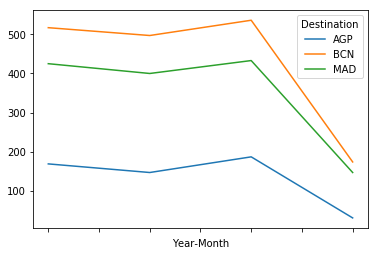

In [139]:
plot_ready.plot()

0
1
2
3


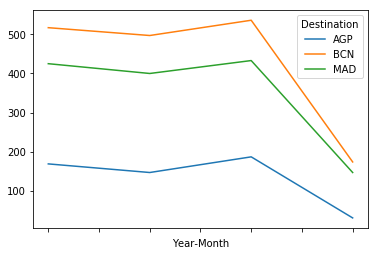

In [159]:
import pandas as pd
%matplotlib inline

si = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', usecols=['Destination', 'Date'] , sep='^', nrows=100000, chunksize=30000)
all_chunks_s = pd.DataFrame()
for i, s in enumerate(si):
    print(i)
    s = s.dropna()
    s = s[ s['Destination'].isin(['AGP', 'BCN', 'MAD'])]
    s['Year-Month'] = s['Date'].str[:7]
    s_gr = s.groupby(['Year-Month', 'Destination']).count().reset_index()
    all_chunks_s = all_chunks_s.append(s_gr)
    
all_result_s = all_chunks_s.groupby(['Year-Month', 'Destination']).sum().reset_index()
all_result_s = all_result_s.rename(columns={'Date':'Count'})
plot_ready = all_result_s.pivot('Year-Month', 'Destination', values='Count')
plot_ready.plot()

In [158]:
all_result_s.head(10)

,Year-Month,Destination,Count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,147
4,2013-02,BCN,497
5,2013-02,MAD,400
6,2013-03,AGP,187
7,2013-03,BCN,536
8,2013-03,MAD,433
9,2013-04,AGP,31


In [ ]:
# Codigo final

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


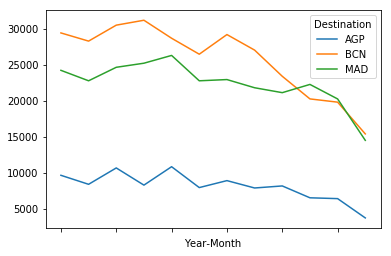

In [160]:
import pandas as pd
%matplotlib inline

si = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', usecols=['Destination', 'Date'] , sep='^', chunksize=1000000)
all_chunks_s = pd.DataFrame()
for i, s in enumerate(si):
    print(i)
    s = s.dropna()
    s = s[ s['Destination'].isin(['AGP', 'BCN', 'MAD'])]
    s['Year-Month'] = s['Date'].str[:7]
    s_gr = s.groupby(['Year-Month', 'Destination']).count().reset_index()
    all_chunks_s = all_chunks_s.append(s_gr)
    
all_result_s = all_chunks_s.groupby(['Year-Month', 'Destination']).sum().reset_index()
all_result_s = all_result_s.rename(columns={'Date':'Count'})
plot_ready = all_result_s.pivot('Year-Month', 'Destination', values='Count')
plot_ready.plot()

# 4) Match searches with bookings

In [161]:
# Resulta que hay duplicates tanto en searches como en bookings. Lo primero que vamos a hacer es quitar los duplicates

In [163]:
import pandas as pd
fi = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2', sep='^', low_memory=False, dtype=str, chunksize=1000000)
all_chunks = pd.DataFrame()
for i, chunk in enumerate(fi):
    all_chunks = all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
    print(i, len(all_chunks))
    
all_chunks.to_csv('searches.no_dup.csv', sep='^', index=False)

0 358999
1 359003
2 359003
3 359003
4 359003
5 359003
6 359003
7 359003
8 359003
9 359003
10 359003
11 359003
12 359003
13 359003
14 359003
15 359003
16 359003
17 359003
18 359003
19 359003
20 359004


In [164]:
import pandas as pd
fi = pd.read_csv('/home/dsc/Data/challenge/bookings.csv.bz2', sep='^', low_memory=False, dtype=str, chunksize=1000000)
all_chunks = pd.DataFrame()
for i, chunk in enumerate(fi):
    all_chunks = all_chunks.append(chunk)
    all_chunks.drop_duplicates(inplace=True)
    print(i, len(all_chunks))
    
all_chunks.to_csv('bookings.no_dup.csv', sep='^', index=False)

0 1000000
1 1000000
2 1000000
3 1000000
4 1000000
5 1000003
6 1000003
7 1000003
8 1000003
9 1000003
10 1000003


In [ ]:
#Action plan:
#1. Seleccionar las columnas de interes de bookings ('dep_port', 'arr_port', 'cre_date           ')  
#2. Arreglar espacios en aeropuertos de bookings   (all_result['arr_port'] = all_result['arr_port'].str.strip())
#3. Drop duplicate de bookings
#4. Poner fechas en mismo formato
#5. Anyadir a la tabla de bookings una columna de '1' (unos)
#6. Search left join con booking
#7. fillna(0) en el resultado final 
#8. Save file

In [165]:
b = pd.read_csv('bookings.no_dup.csv', sep='^', usecols=['dep_port', 'arr_port', 'cre_date           '])
s = pd.read_csv('searches.no_dup.csv', sep='^', low_memory=False)

In [168]:
b.columns = b.columns.str.strip()
b.dep_port = b.dep_port.str.strip()
b.arr_port = b.arr_port.str.strip()

In [170]:
b.dep_port[0], b.arr_port[0]

('ZRH', 'LHR')

In [171]:
b.drop_duplicates(inplace=True)

In [182]:
b.cre_date[0]

'2013-02-22'

In [183]:
s.Date[0]

'2013-01-01'

In [180]:
b.cre_date = b.cre_date.str[:10]

In [181]:
b.cre_date[0]

'2013-02-22'

In [185]:
b['booked'] = 1 

In [186]:
b.head()

,cre_date,dep_port,arr_port,booked
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1


In [187]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [188]:
s_b = s.merge(b, how='left', left_on=['Date', 'Origin', 'Destination'], right_on=['cre_date', 'dep_port', 'arr_port'])

In [189]:
len(s), len(s_b)

(359004, 359004)

In [191]:
s.shape

(359004, 45)

In [192]:
s_b.shape

(359004, 49)

In [195]:
s_b.drop(['cre_date', 'dep_port', 'arr_port'], axis=1, inplace=True)

In [196]:
s_b.shape

(359004, 46)